In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [65]:
l= np.array([54.8,50.8,45.9,41.3,36.8])
t_1 = np.array([16.94,16.88,16.41,16.02,15.95])
t_2 = np.array([17.11,16.66,16.22,16.18,15.81])
t_1_periodo = np.array([t_1[i]/10 for i in range(len(t_1))])
t_2_periodo = np.array([t_2[i]/10 for i in range(len(t_2))])
g = 980
l_total = 111.2
angulo = 8

def promedio(x,y):
    return (x+y)/2

t_prom = np.array([promedio(t_1_periodo[i],t_2_periodo[i]) for i in range(len(t_1))])

tabla_1 = pd.DataFrame({
    'l (cm)': l,
    'T_1 (cm):': t_1_periodo,
    'T_2 (cm)': t_2_periodo,
    'T (s)': t_prom
})
tabla_1



,l (cm),T_1 (cm):,T_2 (cm),T (s)
0,54.8,1.694,1.711,1.7025
1,50.8,1.688,1.666,1.6770
2,45.9,1.641,1.622,1.6315
3,41.3,1.602,1.618,1.6100
4,36.8,1.595,1.581,1.5880


In [66]:
def gamma(x):
    return x**2

def z(x,t):
    return x*((t/(2*np.pi))**2)

Z = np.array([z(l[i],t_prom[i]) for i in range(len(l))])
GAMMA = np.array([gamma(l[i]) for i in range(len(l))])


    

In [67]:
#calculo de la incertidumbre
def incer_gamma(x):
    return 2*x*0.1

def incer_z(x,t,s1,s2):
    def icer_t(x,t):
        return (x/((2*np.pi)**2))*(2*t)
    def incer_x(x,t):
        return (t/(2*np.pi))**2
    return np.sqrt(((incer_x(x,t)*s1)**2)+((icer_t(x,t)*s2)**2))   

def incer_b(l,g):
    return (2*l)/(12*g)

In [68]:
incert_z = np.array([incer_z(l[i],t_prom[i],0.1,0.01) for i in range(len(l))])
incert_gamma = np.array([incer_gamma(l[i]) for i in range(len(l))])

In [69]:
tabla_2 = pd.DataFrame({'L (cm)': l, 'T (s)': t_prom, 'Z': Z, 'Incer Z': incert_z, 'GAMMA': GAMMA, 'Incer GAMMA': incert_gamma})
tabla_2

,L (cm),T (s),Z,Incer Z,GAMMA,Incer GAMMA
0,54.8,1.7025,4.023417,0.047832,3003.04,10.96
1,50.8,1.6770,3.618846,0.043743,2580.64,10.16
2,45.9,1.6315,3.094761,0.038532,2106.81,9.18
3,41.3,1.6100,2.711703,0.034320,1705.69,8.26
4,36.8,1.5880,2.350656,0.030287,1354.24,7.36


In [70]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [71]:
R = regresion_1(GAMMA,Z)

slope: 0.0010197820760307686
intercept: 0.9672594201757425
r: 0.9997504189005926
R^2: 0.9995009000919103
p: 4.732985109940425e-06
std_err: 1.3156758324092887e-05


In [72]:
#Datos experimentales
g_e = 1/0.0010197820760307686
b_e = 0.9672594201757425


valores_tabla_2 = pd.DataFrame({
    'g_exp': [g_e],
    'b_exp': [b_e]
})
valores_tabla_2

,g_exp,b_exp
0,980.601663,0.967259


Periodo con el péndulo físico establece que de la ecuación:
$$
T=2\pi\sqrt{\frac{1/12(L^2+x^2)}{gx}}
$$
nos permite obtener:

$$
z=a\gamma+b \qquad a=\frac{1}{g} \qquad b=\frac{L^2}{12g}
$$

In [73]:
#datos teoricos

a_t = 1/g
b_t = (l_total**2)/(12*g)
incert_b = incer_b(l_total,g)*0.1
x = np.linspace(1354,3000,10
                )

valores_tabla = pd.DataFrame({
    'a_t': [a_t],
    'b_t': [b_t],
    'incert_b': [incert_b]
})
valores_tabla

,a_t,b_t,incert_b
0,0.00102,1.051483,0.001891


In [74]:
def error_relativo(x,y):
    return abs((x-y)/x)*100

error_g = error_relativo(g_e,g)
error_b = error_relativo(b_e,b_t)

errores = pd.DataFrame({
    'error_g': [error_g],
    'error_b': [error_b]
})
errores

,error_g,error_b
0,0.061357,8.707444


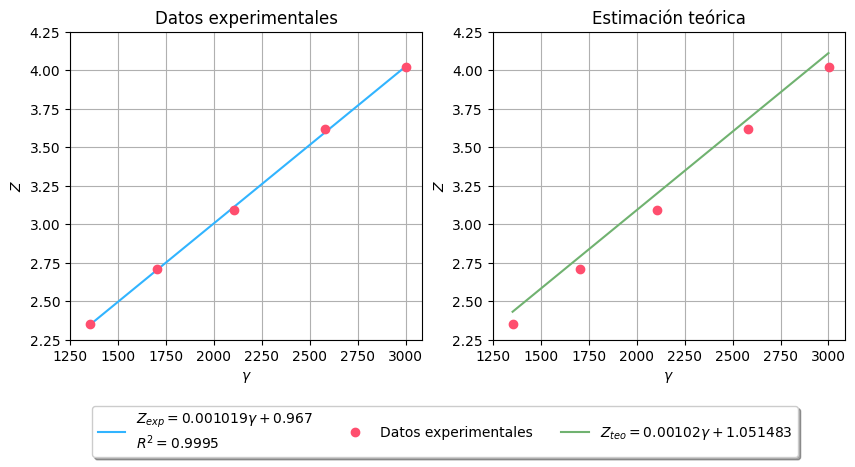

In [75]:
graf_1 = plt.figure(figsize=(10, 4))
spec = graf_1.add_gridspec(ncols=2, nrows=1, figure=graf_1, width_ratios=[1, 1])
ax1 = graf_1.add_subplot(spec[0, 0])
ax1.plot(GAMMA,R, color='#31b4ff',label=r'$Z_{exp} = 0.001019\gamma + 0.967$' + '\n' + r'$R^2 = 0.9995$')
ax1.plot(GAMMA,Z,'o',color='#ff4e6e', label='Datos experimentales')
ax1.set_xlabel(r'$\gamma$')
ax1.set_ylabel(r'$Z$')
ax1.set_xticks(np.arange(1250, 3100, 250))
ax1.set_yticks(np.arange(2.25, 4.5, 0.25))
ax1.set_title('Datos experimentales')
ax1.grid()
ax2 = graf_1.add_subplot(spec[0, 1])
ax2.plot(x,a_t*x+b_t, color='#70b270',label=r'$Z_{teo} = 0.00102\gamma + 1.051483$')
ax2.plot(GAMMA,Z,'o',color='#ff4e6e')
ax2.set_xlabel(r'$\gamma$')
ax2.set_ylabel(r'$Z$')
ax2.set_xticks(np.arange(1250, 3100, 250))
ax2.set_yticks(np.arange(2.25, 4.5, 0.25))
ax2.set_title('Estimación teórica')
ax2.grid()
graf_1.legend(loc='lower center',bbox_to_anchor=(0.5, -0.2), ncol=5,shadow=True, fancybox=True)
plt.savefig('grafica_exp_teo.png', dpi = 300, bbox_inches = 'tight')
plt.show()
